In [1]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import datetime as dt
from math import sqrt, pow
import numpy as np

In [2]:
ds_thanhpho_csv = []
ds_gioitinh_csv = []
ds_tongGTDH_csv = []
ds_rating_csv = []
ds_sp_csv = []

ds_tongGTDH_nu_csv = []
ds_tongGTDH_nam_csv = []

ds_tongGTDH_DN_csv = []
ds_tongGTDH_HN_csv = []
ds_tongGTDH_HCM_csv = []

with open("data/sale_data_vn.csv", mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        ds_thanhpho_csv.append(row[2])
        ds_gioitinh_csv.append(row[4])
        ds_tongGTDH_csv.append(row[10])
        ds_rating_csv.append(row[14])
        ds_sp_csv.append(row[5])
        if row[4] == "Nữ":
            ds_tongGTDH_nu_csv.append(row[10])
        if row[4] == "Nam":
            ds_tongGTDH_nam_csv.append(row[10])
        if row[2] == "Đà Nẵng":
            ds_tongGTDH_DN_csv.append(row[10])
        if row[2] == "Hà Nội":
            ds_tongGTDH_HN_csv.append(row[10])
        if row[2] == "TP HCM":
            ds_tongGTDH_HCM_csv.append(row[10])

In [3]:
def thongKe(ds_TuFileCSV, ds_ThongKe):
    lst_tanSo=[]
    lst_tanSuat=[]
    for gt_thongke in ds_ThongKe:
        tanSo = 0
        for gt_csv in ds_TuFileCSV:
            if gt_thongke == gt_csv:
                tanSo +=1
        lst_tanSo.append(tanSo)
        lst_tanSuat.append(round(tanSo/len(ds_TuFileCSV)*100,2))
    return lst_tanSo, lst_tanSuat

# <font color='red'>Bài 1:</font>

### <font color='blue'>Vẽ biểu đồ cột, pie về tần số, tần suất đơn hàng theo:</font>
* Địa phương (HN, SG, ĐN)
* Giới tính

In [101]:
def ve_BieuDoCot(x1, h1, x2, h2, title):
    fig = plt.figure(figsize=(12,10))

    ax1 = fig.add_subplot(2,2,1)
    ax1.bar(x=x1, height=h1, color="red", alpha=0.6)
    ax1.title.set_text("Tần số đơn hàng")
    ax1.set_ylabel("Tần số")

    ax2 = fig.add_subplot(2,2,2)
    ax2.bar(x=x2, height=h2, color="green", alpha=0.6)
    ax2.title.set_text("Tần suất đơn hàng")
    ax2.set_ylabel("Tần suất")

    fig.suptitle(title)
    #fig.tight_layout(pad=5.0)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.7,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    #plt.tight_layout()
    plt.show()

In [102]:
def ve_BieuDoTron(sizes, labels, title_gt):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            autopct='%.1f%%',
            explode=[0.05]*len(labels), 
            textprops={'color':"w", 'weight':'bold'},
            shadow = True, 
            startangle=90, 
           )

    ax1.axis('equal') 
    ax1.legend(labels, loc=[0.9,0.7])
    plt.title(title_gt)
    #plt.tight_layout()
    plt.show()

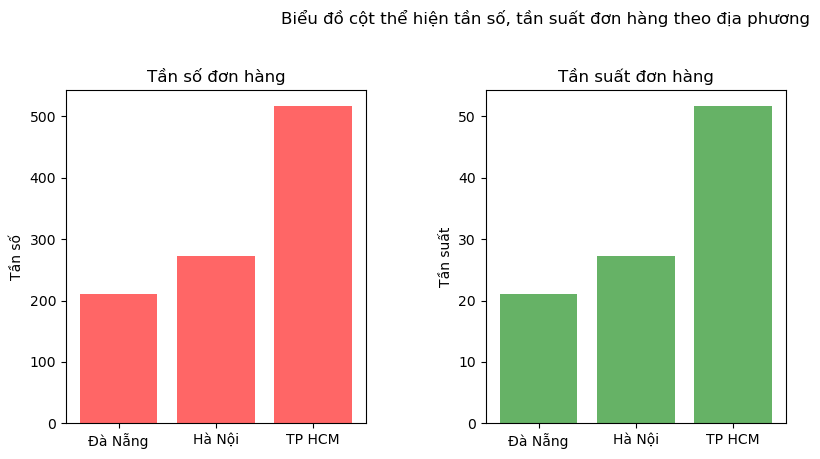

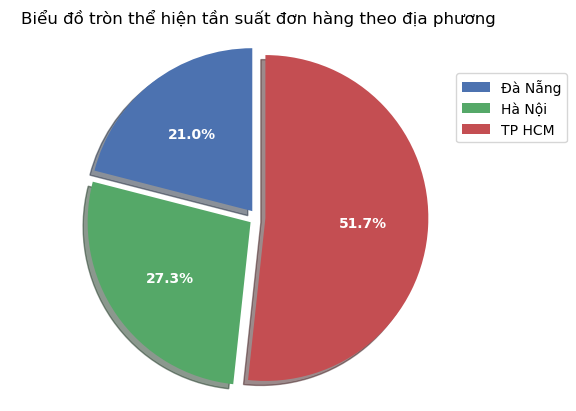

Nhận xét biểu đồ:
TPHCM là địa phương có tần số, tần suất đơn hàng cao nhất trong 3 địa phương Hà Nội, Đà Nẵng và TPHCM


In [107]:
ds_thanhpho_thongke = list(set(ds_thanhpho_csv))
ds_tanSo_dp, ds_tanSuat_dp = thongKe(ds_thanhpho_csv, ds_thanhpho_thongke)

title_dp1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo địa phương"
ve_BieuDoCot(ds_thanhpho_thongke, ds_tanSo_dp, ds_thanhpho_thongke, ds_tanSuat_dp, title_dp1)

title_dp2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo địa phương"
ve_BieuDoTron(ds_tanSuat_dp, ds_thanhpho_thongke, title_dp2)
print("Nhận xét biểu đồ:\nTPHCM là địa phương có tần số, tần suất đơn hàng cao nhất trong 3 địa phương Hà Nội, Đà Nẵng và TPHCM")

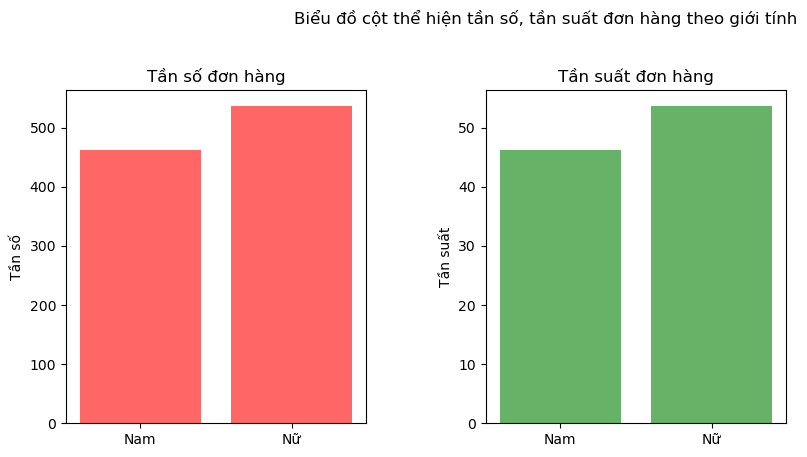

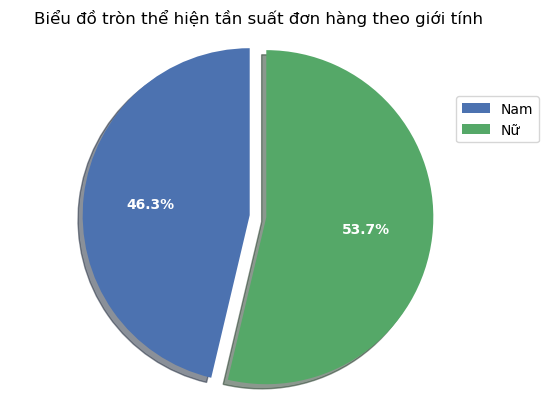

Nhận xét biểu đồ:
Tần số, tần suất đơn hàng của nữ nhiều hơn nam


In [109]:
ds_gioitinh_thongke = list(set(ds_gioitinh_csv))
ds_tanSo_gt, ds_tanSuat_gt = thongKe(ds_gioitinh_csv, ds_gioitinh_thongke)

title_gt1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo giới tính"
ve_BieuDoCot(ds_gioitinh_thongke, ds_tanSo_gt, ds_gioitinh_thongke, ds_tanSuat_gt, title_gt1)

title_gt2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo giới tính"
ve_BieuDoTron(ds_tanSuat_gt, ds_gioitinh_thongke, title_gt2)
print("Nhận xét biểu đồ:\nTần số, tần suất đơn hàng của nữ nhiều hơn nam")

### <font color='blue'>Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating</font>
* Phân bố chung
* Theo giới tính, theo địa phương

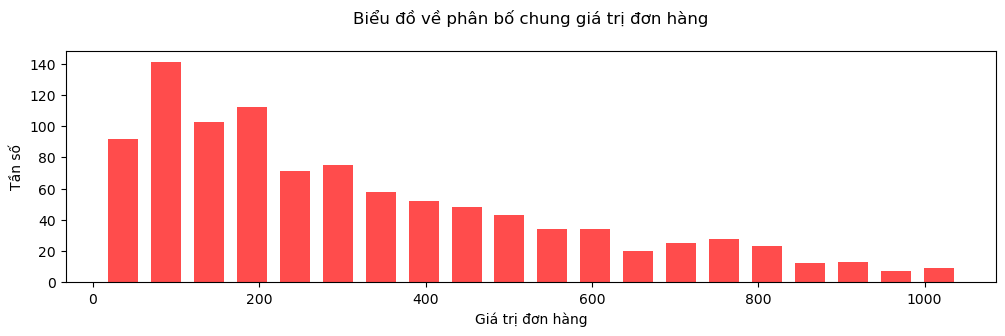

Nhận xét biểu đồ:
Tần số đơn hàng giảm dần theo giá trị đơn hàng
Tần số KH chi <300 cho mỗi đơn hàng chiếm cao nhất
Tần số KH chi >800 cho mỗi đơn hàng chiếm thấp nhất


In [110]:
ds_tongGTDH_csv =[float(x) for x in ds_tongGTDH_csv]

fig, ax = plt.subplots(figsize=(12,3))
ax.hist(ds_tongGTDH_csv, 
        bins = 20,
        alpha=0.7,
        rwidth=0.7,
        facecolor='red'
       )
plt.xlabel('Giá trị đơn hàng')
plt.ylabel('Tần số')
plt.title("Biểu đồ về phân bố chung giá trị đơn hàng", pad=20)
#plt.tight_layout()
plt.show()
print("Nhận xét biểu đồ:\nTần số đơn hàng giảm dần theo giá trị đơn hàng\nTần số KH chi <300 cho mỗi đơn hàng chiếm cao nhất\nTần số KH chi >800 cho mỗi đơn hàng chiếm thấp nhất")

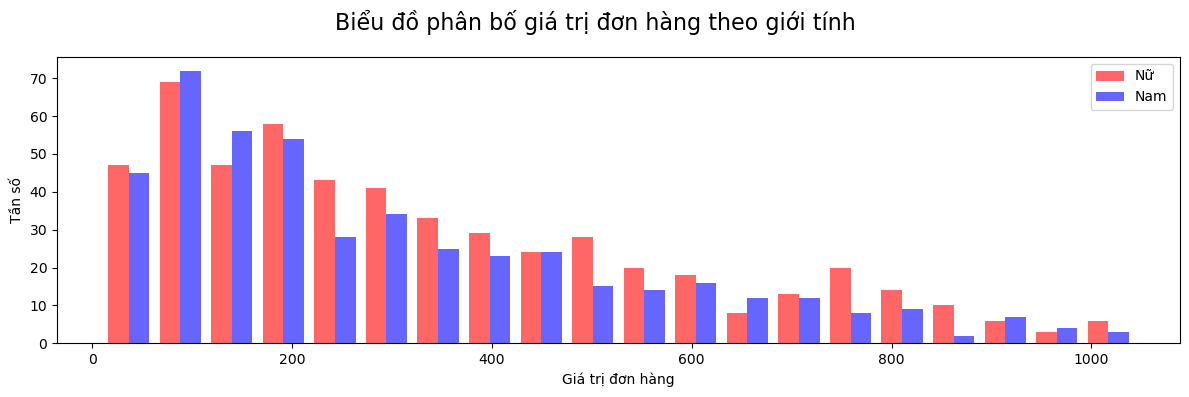

Nhận xét biểu đồ:
Tần số đơn hàng giảm dần theo giá trị đơn hàng
Nữ mua sắm nhiều hơn nam, giá trị đơn hàng nữ mua cao hơn giá trị đơn hàng nam mua
Với giá trị đơn hàng <200, nam mua nhiều hơn nữ
Với giá trị đơn hàng >200, nữ mua nhiều hơn nam



In [113]:
ds_tongGTDH_nu_csv = [float(x) for x in ds_tongGTDH_nu_csv]
ds_tongGTDH_nam_csv = [float(x) for x in ds_tongGTDH_nam_csv]

fig, ax = plt.subplots(figsize=(12,4))

ax.hist([ds_tongGTDH_nu_csv, ds_tongGTDH_nam_csv], 
         label=['Nữ', 'Nam'], color=['r', 'b'], 
         alpha=0.6, bins=20)

ax.set_xlabel("Giá trị đơn hàng")
ax.set_ylabel("Tần số")

fig.suptitle('Biểu đồ phân bố giá trị đơn hàng theo giới tính', fontsize=16)
fig.set_tight_layout(True)
plt.legend(loc='upper right')
plt.show()
print("Nhận xét biểu đồ:\nTần số đơn hàng giảm dần theo giá trị đơn hàng\nNữ mua sắm nhiều hơn nam, giá trị đơn hàng nữ mua cao hơn giá trị đơn hàng nam mua\nVới giá trị đơn hàng <200, nam mua nhiều hơn nữ\nVới giá trị đơn hàng >200, nữ mua nhiều hơn nam\n")

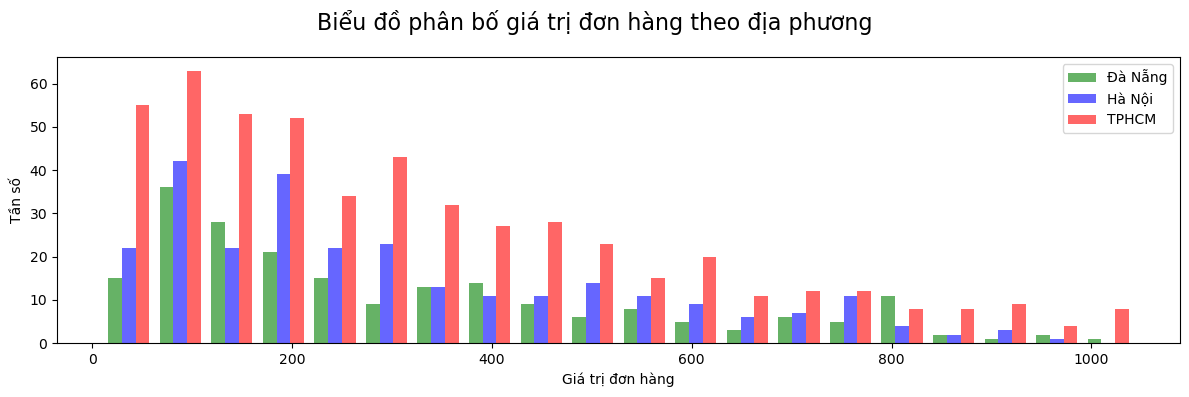

Nhận xét biểu đồ:
Tần số đơn hàng giảm dần theo giá trị đơn hàng
TPHCM là địa phương có tần số mua hàng cao nhất trong 3 địa phương (DN, HN, TPHCM)
Giá trị đơn hàng mỗi lần mua ở TPHCM cao nhất
Giá trị đơn hàng đa số <400 cho mỗi lần mua sắm


In [115]:
ds_tongGTDH_DN_csv = [float(x) for x in ds_tongGTDH_DN_csv]
ds_tongGTDH_HN_csv = [float(x) for x in ds_tongGTDH_HN_csv]
ds_tongGTDH_HCM_csv = [float(x) for x in ds_tongGTDH_HCM_csv]

fig, ax = plt.subplots(figsize=(12,4))

ax.hist([ds_tongGTDH_DN_csv, ds_tongGTDH_HN_csv, ds_tongGTDH_HCM_csv], 
         label=['Đà Nẵng', 'Hà Nội','TPHCM'], color=['g', 'b','r'], 
         alpha=0.6, bins=20)

ax.set_xlabel("Giá trị đơn hàng")
ax.set_ylabel("Tần số")

fig.suptitle('Biểu đồ phân bố giá trị đơn hàng theo địa phương', fontsize=16)
fig.set_tight_layout(True)
plt.legend(loc='upper right')
plt.show()
print("Nhận xét biểu đồ:\nTần số đơn hàng giảm dần theo giá trị đơn hàng\nTPHCM là địa phương có tần số mua hàng cao nhất trong 3 địa phương (DN, HN, TPHCM)\nGiá trị đơn hàng mỗi lần mua ở TPHCM cao nhất\nGiá trị đơn hàng đa số <400 cho mỗi lần mua sắm")

### <font color='blue'>Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating</font>

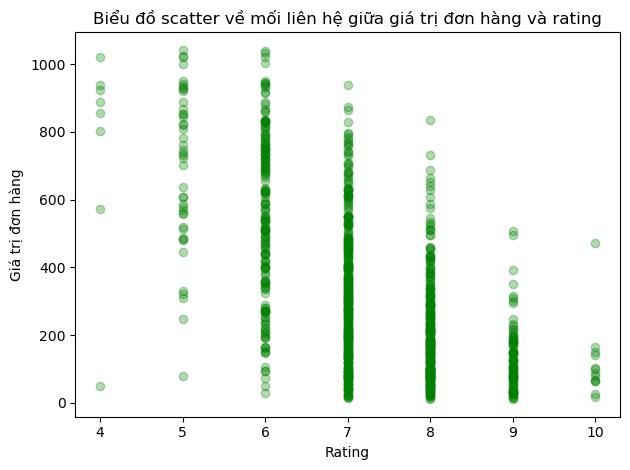

Nhận xét biểu đồ
Giá trị đơn hàng thường <500
KH thường dành ra <500 cho 1 lần mua hàng


In [117]:
ds_tongGTDH_csv = [float(x) for x in ds_tongGTDH_csv]
ds_rating_csv = [int(x) for x in ds_rating_csv]

plt.scatter(ds_rating_csv, ds_tongGTDH_csv, alpha=0.3, color='g')
plt.xlabel("Rating")
plt.ylabel("Giá trị đơn hàng")
plt.title("Biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating")
plt.tight_layout()
plt.show()
print("Nhận xét biểu đồ\nGiá trị đơn hàng thường <500\nKH thường dành ra <500 cho 1 lần mua hàng")

### <font color='blue'>Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')</font>

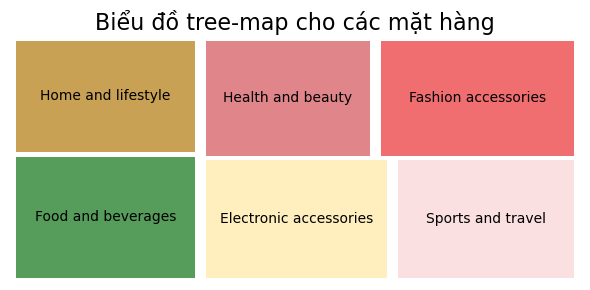

Nhận xét biểu đồ:
Mặt hàng thời trang (Fashion accessories) chiếm nhiều nhất trong các mặt hàng


In [124]:
import squarify

ds_sp_thongke = list(set(ds_sp_csv))
ds_tanSo_sp, ds_tanSuat_sp = thongKe(ds_sp_csv, ds_sp_thongke)

color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

fig = plt.figure(figsize=(6,3))

squarify.plot(sizes=ds_tanSo_sp, 
              label=ds_sp_thongke,
              color=color_list,
              alpha=0.7,
              pad=True
              )
plt.title("Biểu đồ tree-map cho các mặt hàng", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()
print("Nhận xét biểu đồ:\nMặt hàng thời trang (Fashion accessories) chiếm nhiều nhất trong các mặt hàng")

# Bài 2: rút ra nhận xét cho các biểu đồ trên
- Phía dưới ở từng biểu đồ